## Integer/float division in Python 

#### Using "/" for integers

In [1]:
print(5/2)
print(-5/2)

2
-3


#### Using "/" for floating point numbers

In [2]:
print(5.0/2)
print(-5.0/2)

2.5
-2.5


#### Using floor division operator: “//”

In [3]:
print(5//2)
print(-5//2)
print(5.0//2)
print(-5.0//2)

2
-3
2.0
-3.0


## Question: How to use Pandas Pivot Tables
- see [pandas_pivot.ipynb](./extra/pandas_pivot.ipynb)

## Question: What are the different types of cross validations we've covered and examples of use cases/how-to’s? 
- **K-fold**: the most popular method, much faster than exhaustive search
- **LOO**: maximizes the statistical strength of your sample, computationally-intensive

## Background: Resampling vs. Hyperparameter Optimization

**Resampling**: validating models by using random subsets

- **Bootstrapping**: any test or metric that relies on random sampling with replacement
allows assigning measures of accuracy to sample estimates

- **Cross validation**: assess how accurately a predictive model will perform in practice

**Hyperparameter optimization**: find hyperparameters (e.g. regularization) that yield an optimal model which minimizes a predefined loss function on testing data

- **Gridsearch**: an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm
    - Manually tests cartesian product of all parameters

- **Gradient-based**: compute the gradient with respect to hyperparameters and then optimize using gradient descent

- **Cross-validation**: can be used to iteratively search single-parameter space
    - But can also estimate the generalization of performance (resampling)

## Background continued: Cross validation types

**Non-exhaustive** cross-validation: do not compute all ways of splitting the original sample

- E.g. **K-fold** cross-validation: the original sample is randomly partitioned into k equal sized subsamples

**Exhaustive** cross-validation: learn and test on all possible ways to divide the original sample into a training and a validation set

- E.g. **Leave-one-out** cross-validation (**LOO**): 1 observation is used as the validation set and the remaining observations as the training set
    - This is repeated _n_ times

#### Example 1: K-fold cross validation where k=5 folds

In [4]:
# Load packages
import timeit
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, cross_validation
import matplotlib.pyplot as plt

%matplotlib inline

# Load data
wd = './datasets/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')

weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual

# Subset data
modeldata = modeldata.iloc[:1000]
y = y.iloc[:1000]

/Users/dat-44pt/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
def kfold_example():
    kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)

    mse_values = []
    scores = []
    n= 0
    print("~~~~ CROSS VALIDATION each fold ~~~~")
    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
        mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
        scores.append(lm.score(modeldata, y))
        n += 1
        print('Model', n)
        print('MSE:', mse_values[n-1])

    print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
    print('Mean of MSE for all folds:', np.mean(mse_values))
    
timeit.timeit(kfold_example, number=1)

~~~~ CROSS VALIDATION each fold ~~~~
('Model', 1)
('MSE:', 28.27620266309812)
('Model', 2)
('MSE:', 47.35493495124778)
('Model', 3)
('MSE:', 52.65685958976694)
('Model', 4)
('MSE:', 40.61401109376968)
('Model', 5)
('MSE:', 35.374175824447)
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
('Mean of MSE for all folds:', 40.855236824465905)


0.34891295433044434

#### Example 2: LOO cross validation

In [6]:
def loo_example():
    kf = cross_validation.KFold(len(modeldata), n_folds=len(modeldata), shuffle=False)

    mse_values = []
    scores = []

    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
        mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
        scores.append(lm.score(modeldata, y))

    print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
    print('Mean of MSE for all folds:', np.mean(mse_values))

timeit.timeit(loo_example, number=1)

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
('Mean of MSE for all folds:', 40.77255321693947)


6.128749132156372

## Question: How do we use grid search?

/Users/dat-44pt/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'alpha': array([-2.5       , -2.39795918, -2.29591837, -2.19387755, -2.09183673,
       -1.98979592, -1.8877551 , -1.78571429, -1.68367347, -1.58163265,
       -1.47959184, -1.37755102, -1.2755102 , -1.17346939, -1.07142857,
       -0.96938776, -0.86734694, -0.76530612, -0.66326531, -0.56122449,
       -0.45918367, -0.35714286, -0.25510204, -0.15306122, -0.05102041,
        0.05102041,  0.15306122,  0.25510204,  0.35714286,  0.45918367,
        0.56122449,  0.66326531,  0.76530612,  0.86734694,  0.96938776,
        1.07142857,  1.17346939,  1.2755102 ,  1.37755102,  1.47959184,
        1.58163265,  1.68367347,  1.78571429,  1.8877551 ,  1.98979592,
        2.09183673,  2.19387755,  2.29591837,  2.39795918,  2.5       ])}
-44.0098936054


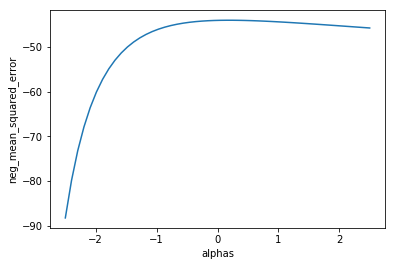

Ridge(alpha=0.15306122448979576, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)


In [7]:
# Use grid search to determine the optimal regularization parameters for our model
from sklearn import grid_search

alphas = np.linspace(-2.5,2.5,50)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error')

gs.fit(modeldata, y)

print(gs.param_grid) # Parameter space explored
print(gs.best_score_) # Best 'neg_mean_squared_error'
plt.plot(alphas,[s[1] for s in gs.grid_scores_],)
plt.xlabel('alphas')
plt.ylabel('neg_mean_squared_error')
plt.show()
print(gs.best_estimator_) # Best combination of paramaters

## Question: When does regularization come into play? 

**Regularization**: is a process of introducing additional information in order to prevent overfitting
- a technique to improve the generalizability of a learned model
- imposes a penalty on the complexity of model predictions

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Regularization.svg/249px-Regularization.svg.png)

We saw how to use regularization first in Lesson 07- we used cross-validation to optimize the regularization of our linear regression model.   
Regularization refers to a variety of techniques, but with linear regression in particular, either Lasso (L1) and Ridge (L2) regularization are available.
- _Rule-of-thumb_: use Lasso (L1) when we have a higher number of features (k) than we have observations (n), and use Ridge (L2) in about all other cases  
We have also seen that we can use regularization with logistic regression, by setting 'C'- the inverse of regularization (smaller values specify stronger regularization). Regularization is also useful for SVM models, among others.  
Regularizers typically have their own parameters, which need to optimized. In the previous cell, we found the ideal value for Ridge parameter _alpha_.  
![](http://scikit-learn.org/stable/_images/sphx_glr_plot_ridge_path_001.png)
The point here is that as the regularization grows greater (right to left), the coefficients are drawn towards zero.

In [9]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

size = 100
 
# We run the method 10 times with different random seeds
for i in range(10):
    print("Random seed %s" % i)
    np.random.seed(seed=i)
    X_seed = np.random.normal(0, 1, size)
    X1 = X_seed + np.random.normal(0, .1, size)
    X2 = X_seed + np.random.normal(0, .1, size)
    X3 = X_seed + np.random.normal(0, .1, size)
    Y = X1 + X2 + X3 + np.random.normal(0, 1, size)
    X = np.array([X1, X2, X3]).T
 
    lr = LinearRegression().fit(X,Y)
    print("Linear model coeff:", lr.coef_)
 
    ridge = Ridge(alpha=10).fit(X,Y)
    print("Ridge model coeff:", ridge.coef_)

Random seed 0
('Linear model coeff:', array([ 0.7284403 ,  2.30926001, -0.08219169]))
('Ridge model coeff:', array([0.93832131, 1.05887277, 0.87652644]))
Random seed 1
('Linear model coeff:', array([ 1.15181561,  2.36579916, -0.59900864]))
('Ridge model coeff:', array([0.98409577, 1.06792673, 0.75855367]))
Random seed 2
('Linear model coeff:', array([0.69734749, 0.32155864, 2.08590886]))
('Ridge model coeff:', array([0.97159124, 0.94256202, 1.08539406]))
Random seed 3
('Linear model coeff:', array([0.28735446, 1.25386129, 1.49054726]))
('Ridge model coeff:', array([0.91891806, 1.00474386, 1.03276594]))
Random seed 4
('Linear model coeff:', array([0.18726691, 0.77214206, 2.1894915 ]))
('Ridge model coeff:', array([0.96401621, 0.98152524, 1.0983599 ]))
Random seed 5
('Linear model coeff:', array([-1.2912413 ,  1.59097473,  2.74727029]))
('Ridge model coeff:', array([0.75819864, 1.01085804, 1.1390417 ]))
Random seed 6
('Linear model coeff:', array([ 1.19909595, -0.0306915 ,  1.91454912]))

The point here is that the coefficients can vary widely for linear regression, depending on the generated data. For L2 regularized model however, the coefficients are quite stable and closely reflect how the data was generated (all coefficients close to 1).